### Data Visualization

In [1]:
#General
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#import combat
#from combat import combat
#import patsy

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [3]:
#Creating a dataframe from txt file

df = pd.read_csv('matrix_standard_mkf52b.txt', delimiter = "\t", header = 0)
pd.set_option('display.max_rows', 800)
df

,Class,Lipid,Occurence,m/z,RTmin,RTmax,01PCCL3Ctrl,02PCCL3Ctrl,03PCCL3Ctrl,04PCCL3TSH0,05PCCL3TSH0,06PCCL3TSH0,07PCCL3TSH24h,08PCCL3TSH24h,09PCCL3TSH24h,10PCCL3TSH48h,11PCCL3TSH48h,12PCCL3TSH48h,13Blank,14BlankStdrmix
0,GL02_DAG,2010063_36:4,NH4 1,634.54047,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.334732e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,GL02_DAG,2010108_38:4,NH4 1,662.57178,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.242980e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
2,GL02_DAG,2010119_38:5,NH4 1,660.55615,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.837245e+05,4.603558e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
3,GL02_DAG,2010151_40:3,NH4 1,692.61877,0.72,0.72,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.882858e+05,0.000000e+00,4.610804e+05,0.000000e+00,0.000000,0.000000e+00
4,GL02_DAG,2010175_40:5,NH4 1,688.58746,0.71,0.72,4.068159e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,SP05_GlcCer,501AA52_30:2,NH4 1,659.52051,1.59,1.71,0.000000e+00,0.000000e+00,0.000000e+00,4.924877e+05,0.000000e+00,6.145548e+05,0.000000e+00,4.329259e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,203132.250488,2.011282e+05
1492,SP05_GlcCer,IS501AA08_42:2,H 1,810.68176,1.28,1.30,5.746747e+06,2.362923e+06,4.421140e+06,1.104483e+06,1.158592e+06,0.000000e+00,3.671420e+06,3.038550e+06,7.532020e+06,7.040428e+06,8.635106e+06,8.894750e+06,0.000000,0.000000e+00
1493,SP05_GlcCer,IS501AC01_34:1,H 1,700.57220,1.39,1.41,1.562770e+07,7.840157e+06,1.278245e+07,3.986229e+06,3.938040e+06,3.370967e+06,1.188790e+07,9.416717e+06,2.769256e+07,1.933890e+07,2.955982e+07,2.770973e+07,0.000000,0.000000e+00
1494,SP05_GlcCer,IS7303902505_36:2,H 1,726.58783,1.34,1.36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.771544e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


In [4]:
#Selection of important characters on columns Class and Lipid

Class2 = []
for row in df['Class']:
    row = row.split('_')
    if row[1] == 'PxCer':
        Class2.append('SM')
    else:
        Class2.append(row[1])
    
df.insert(0, 'Class2', Class2)

Lipid2 = []
for row in df['Lipid']:
    row = row.split('_')
    if row[0] == '1deoxyCer':
        Lipid2.append(f'1deoxyCer({row[1]})')
    elif row[0].startswith('EX'):
        Lipid2.append(f'EX({row[1]})')
    else:
        Lipid2.append(f'({row[1]})')
    
df.insert(2, 'Lipid2', Lipid2)

<AxesSubplot:>

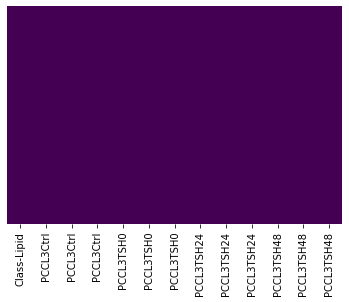

In [5]:
#Elimination of unnecesary columns
df['Class-Lipid'] = df['Class2'] + df['Lipid2']
first_col = df.pop('Class-Lipid')
df.insert(0, 'Class-Lipid', first_col)
df = df.drop(['13Blank','14BlankStdrmix','Occurence','m/z','RTmin','RTmax', 'Class', 'Lipid', 'Class2', 'Lipid2'], axis = 1)
#Rename Columns
df = df.rename(columns = {'01PCCL3Ctrl': 'PCCL3Ctrl', '02PCCL3Ctrl': 'PCCL3Ctrl', '03PCCL3Ctrl': 'PCCL3Ctrl',
                          '04PCCL3TSH0': 'PCCL3TSH0', '05PCCL3TSH0': 'PCCL3TSH0', '06PCCL3TSH0': 'PCCL3TSH0',
                          '07PCCL3TSH24h': 'PCCL3TSH24', '08PCCL3TSH24h': 'PCCL3TSH24', '09PCCL3TSH24h': 'PCCL3TSH24',
                          '10PCCL3TSH48h': 'PCCL3TSH48', '11PCCL3TSH48h': 'PCCL3TSH48', '12PCCL3TSH48h': 'PCCL3TSH48'}
               , inplace = False)

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

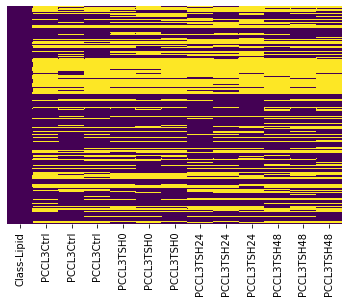

In [6]:
#transform 0 to nans
df.replace(0, np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

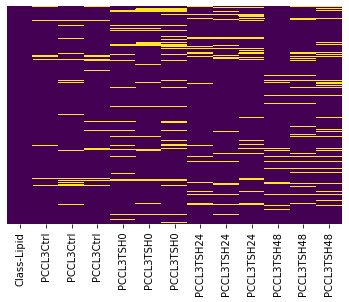

In [7]:
# dropping the NaNs, treshols 7 means that those rows with at least 7 non-NaN values are kept
df = df.dropna(axis=0, how='any', thresh=8, inplace=False)
df = df.reset_index(drop = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [8]:
#transpose of the dataframe
df_t = df.T
df_t = df_t.reset_index(drop = False)
#df_t.iloc[2:,1:] = df_t.iloc[2:,1:].apply(pd.to_numeric, errors='coerce')
df_t

,index,0,1,2,3,4,5,6,7,8,...,791,792,793,794,795,796,797,798,799,800
0,Class-Lipid,DAG(38:3),DAG(47:1),DAG(47:2),DAG(48:2),DAG(50:2),DAG(51:13),DAG(51:2),DAG(56:14),DAG(57:2),...,GlcCer(36:1),GlcCer(38:1),GlcCer(40:1),GlcCer(42:1),GlcCer(41:1),GlcCer(38:2),GlcCer(40:2),GlcCer(42:2),GlcCer(34:1),GlcCer(26:1)
1,PCCL3Ctrl,347808.876953,NaN,NaN,NaN,NaN,35292799.375,444396.969727,10796030.03125,NaN,...,5507642.015625,48301122.25,92347098.25,64233485.375,1086364.019531,NaN,2788144.0,5746746.8125,15627699.375,61137388.875
2,PCCL3Ctrl,NaN,355669.166016,439409.953125,668088.202148,318516.367188,23882272.25,557540.097656,6554265.4375,366013.011719,...,3277131.728516,28845570.1875,55660605.625,34194577.625,661059.289062,739438.289062,1591769.882812,2362922.875,7840157.296875,61511216.75
3,PCCL3Ctrl,418058.460938,289114.063477,NaN,602003.376953,376208.460938,34338002.75,490810.828125,10354081.0625,299891.638672,...,5064398.203125,43816673.75,85040737.0,58417309.375,1276795.164062,829807.5,2338721.84375,4421139.9375,12782447.4375,41523142.0
4,PCCL3TSH0,NaN,430466.422852,536775.84375,627430.935547,393159.423828,29808032.25,695928.527344,9132316.46875,514349.547852,...,590103.54248,12350108.375,23609513.6875,11908924.8125,NaN,NaN,864341.765625,1104483.34375,3986228.785156,76782690.625
5,PCCL3TSH0,307168.945312,301597.802734,470965.398438,519806.798828,431677.078125,29200497.125,551659.547852,9026854.0,412266.180664,...,608281.185547,12428324.1875,22353418.5625,11975144.21875,NaN,NaN,690506.125,1158591.8125,3938040.210938,75738361.125
6,PCCL3TSH0,457417.742188,NaN,422092.225586,720404.753906,NaN,31057749.25,515137.155273,9312264.71875,435157.457031,...,662126.523926,11985305.90625,22525780.1875,12085476.21875,NaN,NaN,472379.875,NaN,3370967.257812,69639969.25
7,PCCL3TSH24,NaN,NaN,NaN,NaN,NaN,23136390.75,402047.734375,7570751.5,426885.326172,...,2884102.277344,30165210.5,61102512.625,39482891.5,NaN,687378.390625,1868235.84375,3671419.921875,11887902.375,60250942.875
8,PCCL3TSH24,361030.351562,323475.652344,479164.703125,650258.289062,441276.530273,24340786.375,NaN,7514219.5625,487764.206055,...,2453452.457031,25308778.6875,50476723.25,32783259.25,NaN,691460.820312,1556927.328125,3038550.46875,9416717.390625,50056159.4375
9,PCCL3TSH24,NaN,421719.30957,586638.287109,NaN,428148.052734,30618193.0,NaN,9453057.78125,NaN,...,7531925.09375,74596679.75,146570423.5,95465608.75,690102.367188,1511950.96875,4593953.5625,7532020.125,27692560.6875,93581014.25


<AxesSubplot:>

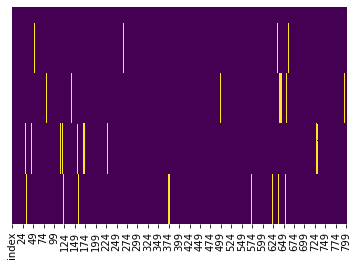

In [9]:
#group by condition and fill nan with the mean of the condition
df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
df_t = df_t.reset_index(drop = True)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

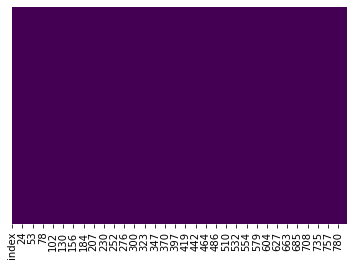

In [10]:
#droppping the rest of the Nans
df_t = df_t.dropna(axis=1, inplace=False)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [11]:
df_t = df_t.rename(columns=df_t.iloc[0])
df_t = df_t.iloc[1: , :]
df_t

,Class-Lipid,DAG(38:3),DAG(47:1),DAG(47:2),DAG(48:2),DAG(50:2),DAG(51:13),DAG(51:2),DAG(56:14),DAG(57:2),...,SM(44:4),GlcCer(34:1),GlcCer(36:1),GlcCer(38:1),GlcCer(40:1),GlcCer(42:1),GlcCer(40:2),GlcCer(42:2),GlcCer(34:1),GlcCer(26:1)
1,PCCL3Ctrl,347808.876953,322391.614746,439409.953125,635045.789551,347362.414062,35292799.375,444396.969727,10796030.03125,332952.325195,...,2160632.4375,15627699.375,5507642.015625,48301122.25,92347098.25,64233485.375,2788144.0,5746746.8125,15627699.375,61137388.875
2,PCCL3Ctrl,382933.668945,355669.166016,439409.953125,668088.202148,318516.367188,23882272.25,557540.097656,6554265.4375,366013.011719,...,1534976.125,7840157.296875,3277131.728516,28845570.1875,55660605.625,34194577.625,1591769.882812,2362922.875,7840157.296875,61511216.75
3,PCCL3Ctrl,418058.460938,289114.063477,439409.953125,602003.376953,376208.460938,34338002.75,490810.828125,10354081.0625,299891.638672,...,1763181.984375,12782447.4375,5064398.203125,43816673.75,85040737.0,58417309.375,2338721.84375,4421139.9375,12782447.4375,41523142.0
4,PCCL3TSH0,382293.34375,430466.422852,536775.84375,627430.935547,393159.423828,29808032.25,695928.527344,9132316.46875,514349.547852,...,1781617.390625,3986228.785156,590103.54248,12350108.375,23609513.6875,11908924.8125,864341.765625,1104483.34375,3986228.785156,76782690.625
5,PCCL3TSH0,307168.945312,301597.802734,470965.398438,519806.798828,431677.078125,29200497.125,551659.547852,9026854.0,412266.180664,...,1907011.806641,3938040.210938,608281.185547,12428324.1875,22353418.5625,11975144.21875,690506.125,1158591.8125,3938040.210938,75738361.125
6,PCCL3TSH0,457417.742188,366032.112793,422092.225586,720404.753906,412418.250977,31057749.25,515137.155273,9312264.71875,435157.457031,...,1666140.0,3370967.257812,662126.523926,11985305.90625,22525780.1875,12085476.21875,472379.875,1131537.578125,3370967.257812,69639969.25
7,PCCL3TSH24,361030.351562,372597.480957,532901.495117,650258.289062,434712.291504,23136390.75,402047.734375,7570751.5,426885.326172,...,1664969.78125,11887902.375,2884102.277344,30165210.5,61102512.625,39482891.5,1868235.84375,3671419.921875,11887902.375,60250942.875
8,PCCL3TSH24,361030.351562,323475.652344,479164.703125,650258.289062,441276.530273,24340786.375,402047.734375,7514219.5625,487764.206055,...,1752281.765625,9416717.390625,2453452.457031,25308778.6875,50476723.25,32783259.25,1556927.328125,3038550.46875,9416717.390625,50056159.4375
9,PCCL3TSH24,361030.351562,421719.30957,586638.287109,650258.289062,428148.052734,30618193.0,402047.734375,9453057.78125,457324.766113,...,2232043.6875,27692560.6875,7531925.09375,74596679.75,146570423.5,95465608.75,4593953.5625,7532020.125,27692560.6875,93581014.25
10,PCCL3TSH48,350704.527344,312265.512695,328125.042969,456398.216797,342539.445312,22812587.6875,516270.671875,5429947.921875,299810.704102,...,2078920.21875,19338899.8125,5268391.570312,39734347.375,84264137.75,48298034.375,4204581.625,7040428.25,19338899.8125,55446708.3125


In [12]:
df_t.iloc[:,1:] = df_t.iloc[:,1:].div(df_t.iloc[:,1:]['PCEX(34:1)'], axis=0)
df_t = df_t.drop(['PCEX(34:1)'], axis = 1)

In [13]:
df_t

,Class-Lipid,DAG(38:3),DAG(47:1),DAG(47:2),DAG(48:2),DAG(50:2),DAG(51:13),DAG(51:2),DAG(56:14),DAG(57:2),...,SM(44:4),GlcCer(34:1),GlcCer(36:1),GlcCer(38:1),GlcCer(40:1),GlcCer(42:1),GlcCer(40:2),GlcCer(42:2),GlcCer(34:1),GlcCer(26:1)
1,PCCL3Ctrl,0.000121,0.000112,0.000153,0.00022,0.000121,0.012252,0.000154,0.003748,0.000116,...,0.00075,0.005425,0.001912,0.016768,0.032058,0.022298,0.000968,0.001995,0.005425,0.021224
2,PCCL3Ctrl,0.000157,0.000146,0.000181,0.000275,0.000131,0.009816,0.000229,0.002694,0.00015,...,0.000631,0.003222,0.001347,0.011856,0.022877,0.014054,0.000654,0.000971,0.003222,0.025282
3,PCCL3Ctrl,0.00016,0.00011,0.000168,0.00023,0.000144,0.013114,0.000187,0.003954,0.000115,...,0.000673,0.004882,0.001934,0.016734,0.032479,0.022311,0.000893,0.001689,0.004882,0.015858
4,PCCL3TSH0,0.000135,0.000153,0.00019,0.000222,0.000139,0.010562,0.000247,0.003236,0.000182,...,0.000631,0.001412,0.000209,0.004376,0.008365,0.00422,0.000306,0.000391,0.001412,0.027206
5,PCCL3TSH0,0.00011,0.000108,0.000169,0.000187,0.000155,0.010486,0.000198,0.003242,0.000148,...,0.000685,0.001414,0.000218,0.004463,0.008027,0.0043,0.000248,0.000416,0.001414,0.027198
6,PCCL3TSH0,0.000158,0.000127,0.000146,0.000249,0.000143,0.010743,0.000178,0.003221,0.000151,...,0.000576,0.001166,0.000229,0.004146,0.007792,0.00418,0.000163,0.000391,0.001166,0.024089
7,PCCL3TSH24,0.00015,0.000155,0.000221,0.00027,0.00018,0.009601,0.000167,0.003142,0.000177,...,0.000691,0.004933,0.001197,0.012518,0.025357,0.016385,0.000775,0.001524,0.004933,0.025004
8,PCCL3TSH24,0.000152,0.000136,0.000201,0.000273,0.000185,0.010224,0.000169,0.003156,0.000205,...,0.000736,0.003955,0.001031,0.010631,0.021202,0.01377,0.000654,0.001276,0.003955,0.021025
9,PCCL3TSH24,0.000101,0.000118,0.000163,0.000181,0.000119,0.008533,0.000112,0.002634,0.000127,...,0.000622,0.007717,0.002099,0.020789,0.040846,0.026605,0.00128,0.002099,0.007717,0.026079
10,PCCL3TSH48,0.000221,0.000197,0.000207,0.000288,0.000216,0.014387,0.000326,0.003424,0.000189,...,0.001311,0.012196,0.003322,0.025058,0.053141,0.030459,0.002652,0.00444,0.012196,0.034967


## Volcano Plot 0h vs 48h

In [14]:
#creating new df with mean, std and n.obs
df4 = df_t.set_index(['Class-Lipid']).T.astype('float64').copy()
df_pvalue = pd.DataFrame()
df_pvalue['PCCL3TSH0_mean'] = df4.groupby(axis = 1, level = 0).mean()['PCCL3TSH0']
df_pvalue['PCCL3TSH0_std'] = df4.groupby(axis = 1, level = 0).std()['PCCL3TSH0']
df_pvalue['PCCL3TSH0_n'] = 3
df_pvalue['PCCL3TSH48_mean'] = df4.groupby(axis = 1, level = 0).mean()['PCCL3TSH48']
df_pvalue['PCCL3TSH48_std'] = df4.groupby(axis = 1, level = 0).std()['PCCL3TSH48']
df_pvalue['PCCL3TSH48_n'] = 3

#pvalue function
df_pvalue['pvalue'] = df_pvalue.apply(lambda x: stats.ttest_ind_from_stats(x['PCCL3TSH48_mean'],x['PCCL3TSH48_std'],x['PCCL3TSH48_n'], 
                                                     x['PCCL3TSH0_mean'],x['PCCL3TSH0_std'],x['PCCL3TSH0_n'])[1],axis=1)
# convert pvalue to minus log10
df_pvalue['pvalue'] = df_pvalue['pvalue'].transform(lambda x: -np.log10(x))
df_pvalue = df_pvalue.rename(columns = {'pvalue': 'minuslog10_pvalue'}, inplace = False)

#fold change
df_pvalue['fold_change'] = df_pvalue['PCCL3TSH48_mean'].div(df_pvalue['PCCL3TSH0_mean'], axis = 0)

# convert fold change to log2
df_pvalue['log2_fold_change'] = df_pvalue['fold_change'].transform(lambda x: np.log2(x))

# save to csv
df_pvalue.to_csv('pccl3_tsh_fc_pvalue.csv')

In [15]:
df_pvalue

,PCCL3TSH0_mean,PCCL3TSH0_std,PCCL3TSH0_n,PCCL3TSH48_mean,PCCL3TSH48_std,PCCL3TSH48_n,minuslog10_pvalue,fold_change,log2_fold_change
DAG(38:3),0.000135,0.000024,3,0.000214,0.000019,3,1.975582,1.590502,0.669482
DAG(47:1),0.000129,0.000022,3,0.000186,0.000021,3,1.475698,1.439299,0.525367
DAG(47:2),0.000168,0.000022,3,0.000173,0.000030,3,0.073259,1.026554,0.037809
DAG(48:2),0.000219,0.000031,3,0.000241,0.000041,3,0.283704,1.096264,0.132596
DAG(50:2),0.000146,0.000008,3,0.000181,0.000031,3,0.872984,1.239249,0.309466
DAG(51:13),0.010597,0.000132,3,0.012909,0.001388,3,1.343269,1.218170,0.284716
DAG(51:2),0.000208,0.000035,3,0.000262,0.000055,3,0.645346,1.260520,0.334019
DAG(56:14),0.003233,0.000010,3,0.003028,0.000345,3,0.442633,0.936527,-0.094607
DAG(57:2),0.000160,0.000019,3,0.000158,0.000027,3,0.040404,0.985777,-0.020667
DAG(46:1),0.000182,0.000003,3,0.000396,0.000065,3,2.323217,2.173241,1.119848


In [30]:
# Creation of the volcano class to generate the plot.... this could be in a separate file

class Volcano(object):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.style.use('ggplot')
    
    def __init__(self, ratio, p_val, label=None, s_curve_x_axis_overplot=0.5, s_curve_y_axis_overplot=0.5):
        """
        careful use ratio not difference as in Perseus 
        ratio of 0.5 instead of difference -2
        :param ratio: Pandas.Series or Numpy.Array or List of log2(ratios)
        :param p_val: Pandas.Series or Numpy.Array or List of -log10(p-values) 
        :param label: Pandas.Series or Numpy.Array or ListOfString
        """
        assert len(ratio) == len(p_val)
        self.df = pd.DataFrame({"ratio": ratio, "p_val": p_val})
        if label is not None:
            self.df["label"] = label
        self.s_curve_y_axis_overplot = s_curve_y_axis_overplot
        self.p_val_cutoff = self.get_p_val_cutoff()
        self.ratio_cutoff = self.get_ratio_cutoff()
        self.df["s_val"] = self.df.apply(self.calc_s_from_row, axis=1)
        self.ratio_for_s = pd.Series(np.linspace(self.df["ratio"].min() - s_curve_x_axis_overplot, self.df["ratio"].max() + s_curve_x_axis_overplot, num=1000))
        self.p_for_s_larger_1 = self.ratio_for_s.apply(self.calc_p_for_s_equals_1)

    def get_p_val_cutoff(self):
        """
        p_val_cutoff = 0.05
        pc = 3.5 + median(p_val(50% lowest log2_ratios)) --> is what Jan uses for whatever reason ???
        -log10_pval of 2.0 --> pval of 0.01
        """
        ### hard coded cutoff of 1%
        # return math.log(0.01, 10) * -1
        ### Jan's cutoff, but how to justify???
        quant = self.df["ratio"].quantile(0.5)
        return 2.0 + self.df.loc[self.df["ratio"] < quant, "p_val"].median()

    def get_ratio_cutoff(self):
        """
        log2_ratio_cutoff = 2.0 
        ratio_cutoff_high = 2 + median(ratio(50% lowest log10_p_values))
        ratio_cutoff_low = 0.5 - median(ratio(50% lowest log10_p_values))        
        """
        ### hard coded cutoff of 2 fold enrichment or depletion
        # return math.log(0.5, 2), math.log(2, 2)
        ### Jan's cutoff, how to justify???
        quant = self.df["p_val"].quantile(0.5)
        median_ = self.df.loc[self.df["p_val"] < quant, "ratio"].median()
        ratio_cutoff_high = 2.0 + median_
        ratio_cutoff_low = -2.0 - median_
        return ratio_cutoff_low, ratio_cutoff_high

    def calc_s_from_row(self, row):
        p_val = row["p_val"]
        ratio = row["ratio"]
        return self.calc_s(p_val, ratio)

    def calc_s(self, p_val, ratio):
        """
        so the algorithmn for finding stuff with s > 1 is:
        discard stuff below the ratio_cutoff
        discard stuff below the p-val cutoff
        do the calcuation for the stuff above BOTH cutoffs and accept all with s > 1
        s = (p_val - p_val_cutoff) * (ratio - ratio_cutoff)
        :param p_val: Float(-log10 p-value)
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_delta = 0
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        if ratio > 0:
            ratio_delta = ratio - ratio_cutoff_high
            if ratio_delta < 0:
                return 0
        elif ratio < 0:
            ratio_delta = ratio - ratio_cutoff_low
            if ratio_delta > 0:
                return 0
        ratio_delta = abs(ratio_delta)
        p_val_delta = p_val - self.p_val_cutoff
        if p_val_delta < 0:
            return 0
        return p_val_delta * ratio_delta

    def calc_p_for_s_equals_1(self, ratio):
        """
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        ratio_delta_high = ratio - ratio_cutoff_high
        ratio_delta_low = ratio - ratio_cutoff_low

        if ratio > ratio_cutoff_high:
            return (1.0 / ratio_delta_high) + self.p_val_cutoff
        elif ratio < ratio_cutoff_low:
            return (1.0 / (ratio_delta_low * -1)) + self.p_val_cutoff
        else:
            return np.nan

    def get_fig(self, title="Volcano plot", s_value_cutoff=1.0):
        fig, ax1 = plt.subplots(figsize=(12, 12))
        ax1.set_title(title, fontsize=22, fontweight="bold")

        cond_p_val = self.p_for_s_larger_1 <= (self.df["p_val"].max() + self.s_curve_y_axis_overplot)
        cond_pos = self.ratio_for_s > 0
        x1 = self.ratio_for_s[cond_pos & cond_p_val]
        y1 = self.p_for_s_larger_1[cond_pos & cond_p_val]

        cond_neg = self.ratio_for_s < 0
        x2 = self.ratio_for_s[cond_neg & cond_p_val]
        y2 = self.p_for_s_larger_1[cond_neg & cond_p_val]

        x3 = self.df["ratio"]
        y3 = self.df["p_val"]

        ax1.plot(x1, y1, 'r-', x2, y2, 'r-', x3, y3, 'b.', markersize=5, alpha = 0.7)  #, alpha=0.7)
        ax1.set_xlabel('log2(ratio)', fontsize=20)
        ax1.set_ylabel('-log10(p-value)', fontsize=20)

        if "label" in self.df.columns:
            cond = abs(self.df["ratio"]) >= 1
            for index_, row in self.df[cond].iterrows():
                label = row["label"]
                x_coord = row["ratio"]
                y_coord = row["p_val"]
                ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                    textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = 4)

        return fig

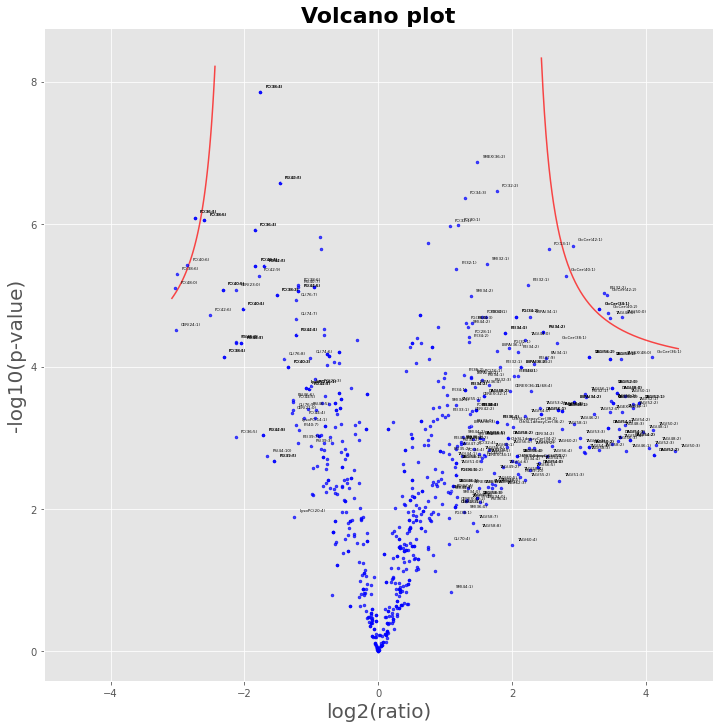

In [31]:
#create the Volcano object

df_pvalue2 = df_pvalue.reset_index()
df_pvalue2 = df_pvalue2.replace(0, np.nan)
df_pvalue2 = df_pvalue2.dropna(how='all', axis=0)

v = Volcano(df_pvalue2["log2_fold_change"], df_pvalue2["minuslog10_pvalue"], df_pvalue2["index"], 
            s_curve_x_axis_overplot=.05, 
            s_curve_y_axis_overplot=.5)

fig = v.get_fig()
plt.xlim([-5, 5])
fig.savefig("pccl3_tsh_volcano2.svg", format='svg', dpi=1200)

In [22]:
#transform the data to log2

df_t.iloc[:,1:] = df_t.iloc[:,1:].transform(lambda x: np.log2(x.astype('float64')))

/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/envs/lipidomics/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [23]:
#calculate z_score

z_scores = df_t.iloc[:,1:].transform(lambda x : zscore(x.astype('float64'),ddof=1))

In [24]:
#merge z_score with Lipid-Class column to create df_final

df_final = pd.concat([df_t.iloc[:,:1], z_scores], axis = 1)

In [25]:
df_final

,Class-Lipid,DAG(38:3),DAG(47:1),DAG(47:2),DAG(48:2),DAG(50:2),DAG(51:13),DAG(51:2),DAG(56:14),DAG(57:2),...,SM(44:4),GlcCer(34:1),GlcCer(36:1),GlcCer(38:1),GlcCer(40:1),GlcCer(42:1),GlcCer(40:2),GlcCer(42:2),GlcCer(34:1),GlcCer(26:1)
1,PCCL3Ctrl,-0.923818,-1.071900,-1.000146,-0.373559,-1.314915,0.688371,-0.871606,1.387260,-1.428540,...,-0.062355,0.215868,0.442705,0.401573,0.354764,0.518997,0.197430,0.380311,0.215868,-0.821662
2,PCCL3Ctrl,0.121066,0.187602,0.258700,1.075067,-0.855885,-0.799945,0.582414,-1.263924,-0.028943,...,-0.711190,-0.379741,0.124480,-0.079787,-0.094358,-0.054426,-0.229659,-0.419791,-0.379741,-0.140521
3,PCCL3Ctrl,0.177600,-1.135470,-0.288553,-0.096307,-0.336160,1.145199,-0.155781,1.818171,-1.476942,...,-0.466709,0.095229,0.453209,0.398828,0.372122,0.519682,0.109856,0.194947,0.095229,-1.956048
4,PCCL3TSH0,-0.470570,0.387727,0.644239,-0.318206,-0.508953,-0.308349,0.851712,0.207697,0.989667,...,-0.709011,-1.322869,-1.567860,-1.463962,-1.433532,-1.549183,-1.057404,-1.430067,-1.322869,0.144951
5,PCCL3TSH0,-1.280117,-1.226612,-0.230789,-1.471082,0.087940,-0.356596,0.047312,0.222079,-0.114012,...,-0.403647,-1.321447,-1.528118,-1.436577,-1.488459,-1.525639,-1.287647,-1.362006,-1.321447,0.143830
6,PCCL3TSH0,0.141906,-0.490108,-1.326461,0.434837,-0.376023,-0.193884,-0.341925,0.171487,-0.025806,...,-1.050425,-1.542025,-1.485066,-1.538962,-1.528058,-1.560745,-1.742457,-1.429870,-1.542025,-0.328655
7,PCCL3TSH24,-0.073098,0.452302,1.768473,0.960216,0.935032,-0.948264,-0.583618,-0.028863,0.839261,...,-0.370162,0.107240,0.017176,-0.004278,0.042641,0.136194,-0.044507,0.080728,0.107240,-0.183581
8,PCCL3TSH24,-0.025528,-0.157404,1.066126,1.039828,1.086148,-0.526499,-0.539270,0.007861,1.611339,...,-0.133211,-0.145415,-0.118775,-0.231293,-0.195592,-0.079820,-0.230121,-0.116147,-0.145415,-0.858211
9,PCCL3TSH24,-1.642638,-0.841335,-0.483574,-1.666497,-1.373976,-1.740608,-2.046819,-1.443248,-0.909595,...,-0.764268,0.618855,0.527501,0.700104,0.677264,0.738348,0.502429,0.436834,0.618855,-0.019640
10,PCCL3TSH48,1.462005,1.592590,1.273037,1.385513,1.941381,1.766900,1.872976,0.662585,1.185045,...,2.032018,1.142110,0.944711,0.959508,1.027512,0.906429,1.296420,1.269529,1.142110,1.121978


In [26]:
#save to csv
df_final.to_csv('pccl3_tsh.csv')

In [28]:
#Plot
df2 = df_final.copy()
df2.set_index('Class-Lipid', inplace=True)


#Clustermap

ax = sns.clustermap(df2,
                    z_score = 1,
                    cmap="vlag",
                    #center=0, 
                    #vmin = -1,
                    #vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

plt.title('Cluster map of Kinase-Lipid before batch correction -Non-normalized-', fontsize = 60) # title with fontsize 20
plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
plt.ylabel('Treatment', fontsize =80) # y-axis label with fontsize 15

#ax.savefig("databeforecombat.png")

Text(2418.931818181818, 0.5, 'Treatment')

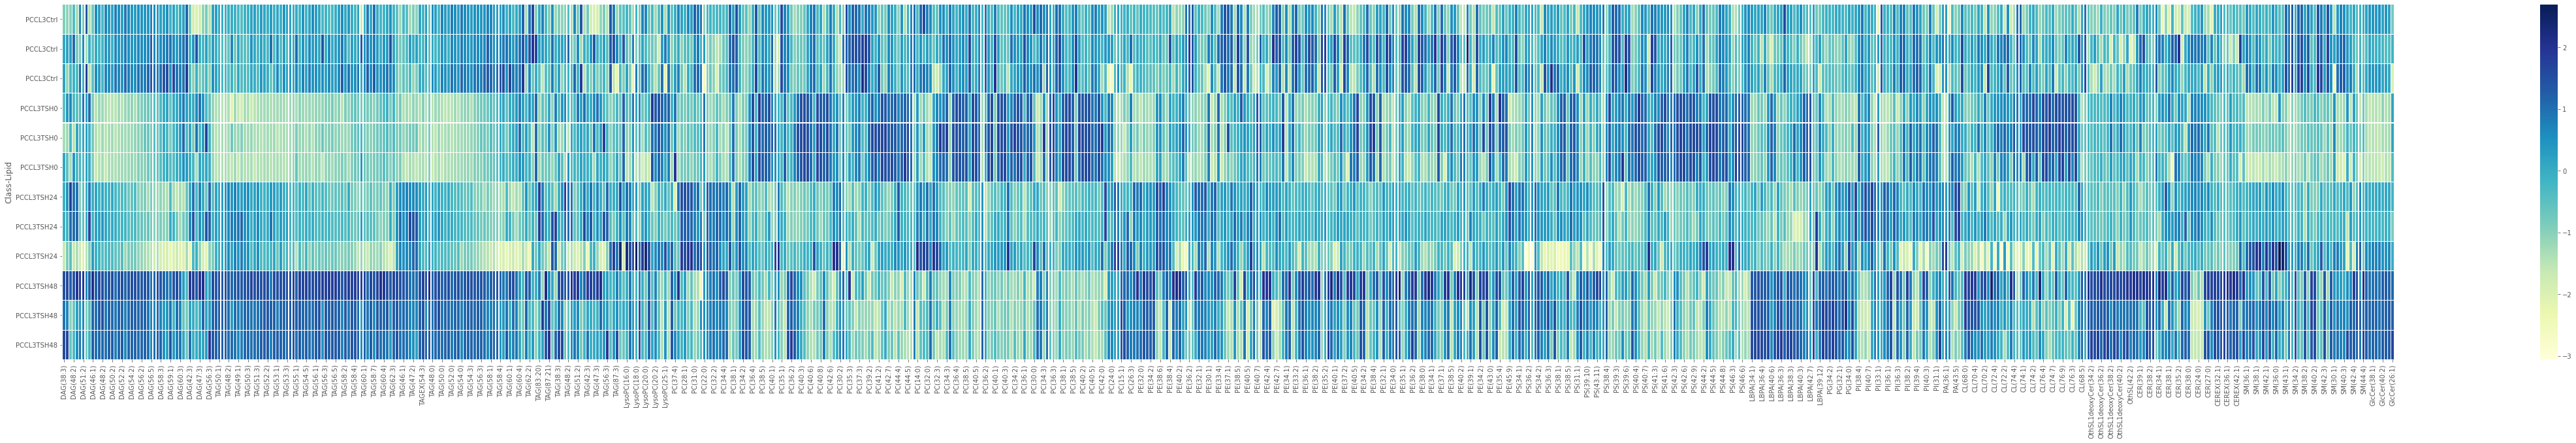

In [29]:
fig, ax = plt.subplots(figsize=(80,10))
ax = sns.heatmap(df2,
                 #vmin=-3,
                 #vmax=3,
                 cmap="YlGnBu",
                 linewidths=.1)
fig.savefig("pccl3_tsh.png")

In [ ]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = df2.corr()
correlations_array = np.asarray(df2.corr())

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

g = sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(100, 100))
g.savefig("pccl3_tsh_corr.png")

In [ ]:
import seaborn
import scipy

g = seaborn.clustermap(df2,method='average')
den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage, labels = df2.index,color_threshold=0.60)  
from collections import defaultdict

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

cluster = []
for i in df.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

df2["cluster"] = cluster

In [ ]:
df2.columns

In [ ]:
scaler = StandardScaler()
sns.heatmap(scaler.fit_transform(df.to_numpy()))

In [ ]:
#Transpose back the dataframe
df = df_t.T
df = df.reset_index(drop=True)
df = df.rename(columns=df.iloc[0])
df = df[1:]

In [ ]:
#Merging of the datasets of all the lipids

data_concat = pd.concat([data_cl, data_n1,data_p1,data_p2], axis=1)
data_concat = data_concat.loc[:,~data_concat.columns.duplicated()]

# And the cell number
data_concat = data_concat.merge(data_cn, on='CP0_ID.BR')

In [ ]:
#Elimination of unnecesary columns
data_concat = data_concat.drop(['Unnamed: 0','CP0_ID.BR','BR','CP0_ID','CP_plate','GENE_y','Series', 'Cell area covered by objects (%)'], axis=1)

In [ ]:
#Same process as before but for cell number
data_concat['Cell number'] = data_concat['Cell number'].apply(pd.to_numeric, errors='coerce')
data_concat = data_concat.groupby(['GENE_x','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE_x']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
# Loading / Saving dataset

data_concat.to_csv('rawdata_allkinases.csv')
#data_concat = pd.read_csv('data_concat.csv')
#data_concat = data_concat.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Normalising the data by Cell Number
data_concat.iloc[:,2:756] = data_concat.iloc[:,2:756].div(data_concat['Cell number'], axis=0)
data_concat = data_concat.drop(['Cell number'], axis=1)

In [ ]:
#Outliers removal INSIDE BATCH (z-score > 3)
z_scores = data_concat.groupby(['GENE','Batch']).transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Outliers removal OVERALL (z-score > 3)
z_scores = data_concat.iloc[:,2:755].transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Transform the data to log10 (OPTIONAL)

#data_log = data_concat
#data_log.iloc[:,2:755] = np.log10(data_log.iloc[:,2:755])

In [ ]:
# Taking the mean for each kinase

concat_mean = data_concat.groupby(['GENE_x']).mean().reset_index()
concat_mean = concat_mean.drop(['Batch'], axis=1)

In [ ]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

concat_mean.iloc[:,2:756] = scaler.fit_transform(concat_mean.iloc[:,2:756].to_numpy())

In [ ]:
#MAKE GENE AS INDEX
concat_mean.set_index('GENE_x', inplace=True)

In [ ]:
#Filtering all the same lipids in one column / grouped by the name of lipids

filter_col_SM = [col for col in batch if col.startswith('SM')]
filter_col_GlcCer = [col for col in batch if col.startswith('Glc')]
filter_col_Cer = [col for col in batch if col.startswith('DHCer')] + [col for col in batch if col.startswith('Cer')]
filter_col_CL = [col for col in batch if col.startswith('CL')]
filter_col_LysoPC = [col for col in batch if col.startswith('LysoPC')]
filter_col_PC = [col for col in batch if col.startswith('PC')]
filter_col_LysoPE = [col for col in batch if col.startswith('LysoPE')]
filter_col_PE = [col for col in batch if col.startswith('PE')]
filter_col_LysoPI = [col for col in batch if col.startswith('LysoPI')]
filter_col_PI = [col for col in batch if col.startswith('PI')]
filter_col_LysoPS = [col for col in batch if col.startswith('LysoPS')]
filter_col_PS = [col for col in batch if col.startswith('PS')]

lipids_sum = filter_col_CL + filter_col_LysoPC + filter_col_PC + filter_col_LysoPE + filter_col_PE + filter_col_SM + filter_col_GlcCer + filter_col_Cer + filter_col_LysoPI + filter_col_PI + filter_col_LysoPS + filter_col_PS

In [ ]:
#Sum up all the all the lipids with the same head-group

batch['CL_Sum'] = batch[filter_col_CL].sum(axis=1)
batch['LysoPC_Sum'] = batch[filter_col_LysoPC].sum(axis=1)
batch['PC_Sum'] = batch[filter_col_PC].sum(axis=1)
batch['LysoPE_Sum'] = batch[filter_col_LysoPE].sum(axis=1)
batch['PE_Sum'] = batch[filter_col_PE].sum(axis=1)
batch['SM_Sum'] = batch[filter_col_SM].sum(axis=1)
batch['GlcCer_Sum'] = batch[filter_col_GlcCer].sum(axis=1)
batch['Cer_Sum'] = batch[filter_col_Cer].sum(axis=1)
batch['LysoPI_Sum'] = batch[filter_col_LysoPI].sum(axis=1)
batch['PI_Sum'] = batch[filter_col_PI].sum(axis=1)
batch['LysoPS_Sum'] = batch[filter_col_LysoPS].sum(axis=1)
batch['PS_Sum'] = batch[filter_col_PS].sum(axis=1)

In [ ]:
# Eliminate non-essential columns and keep only the sumed-up ones

features_sum = ['GENE', 'Batch', 'CL_Sum', 'LysoPC_Sum', 'PC_Sum',
                'LysoPE_Sum', 'PE_Sum', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum',
                'LysoPI_Sum', 'PI_Sum', 'LysoPS_Sum', 'PS_Sum']
batch_sum = batch[features_sum]

In [ ]:
pd.set_option('display.max_rows', 800)
batch_sum_mean

In [ ]:
#Calculate z-score
from scipy.stats import zscore
zlog_batch = log_batch.apply(zscore)